<h1>Compute 95% Confidence Interval for SIR Predictions</h1>

<p>In this tutorial we are going how to insert uncertainties in our preditctions. For achive it we are going to compute a non-parametric interval around our predictions. The interval is created using a techinique called bootstrap.</p>

<p>It's easy to compute confidence interval using the class SIR_EDO. This class now have a method calling fit_predictCI that returns a pandas data frame, with all you need to put uncertainties around your predictions. This methods take advantage of multprocessing system and can be distributed across your system.</p>

In [1]:
import multiprocessing as mp
import sys
#add the path were the models are
sys.path.append("../inProduction/")
import pandas as pd
import numpy as np
from plotnine import *
from mizani.breaks import date_breaks
from mizani.formatters import date_format
from itertools import repeat
import time
from functools import reduce
from sirGA import SIR_GA
#set default theme for plts
theme_set(theme_linedraw())

In [2]:
data = pd.read_csv("../data/estados.csv")
#Select only Sao Paulo
sp = data[data["state"] == "SP"]
#Remove missing values to not crash the intervals
sp = sp.dropna()
#create a series with the cummulative number of cases
y = sp["TOTAL"]

#Give the number of days since the day of first case confirmed
x = range(0,len(sp["newCases"]))

In [3]:
#start model
model = SIR_GA(50000000)

In [4]:
model.fit(x = x, y = y)

In [5]:
start = time.time()
resultdf = model.predictCI(x = x, y = y, ndays = 7, start = "2020-02-25",  bootstrap = 60, n_jobs = 8)
end = time.time()
print("Bootstrap tooks {} minutes to run".format((end - start)/60))

Bootstrap tooks 3.3547851125399273 minutes to run


In [6]:
resultdf

,date,Pred,Pred_lb,Pred_ub,I,I_lb,I_ub,S,S_lb,S_ub,R,R_lb,R_ub
0,2020-02-25,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000e+07,5.000000e+07,5.000000e+07,0.000000,0.000000,0.000000
1,2020-02-26,1.449331,1.446085,1.451916,1.226146,1.224083,1.228584,5.000000e+07,5.000000e+07,5.000000e+07,0.223119,0.220811,0.223437
2,2020-02-27,1.999638,1.992140,2.006482,1.503116,1.498071,1.509090,5.000000e+07,5.000000e+07,5.000000e+07,0.496244,0.491040,0.497585
3,2020-02-28,2.673808,2.659530,2.687213,1.842431,1.833174,1.853413,5.000000e+07,5.000000e+07,5.000000e+07,0.830878,0.821840,0.834054
4,2020-02-29,3.502345,3.478426,3.525487,2.259446,2.244322,2.277421,5.000000e+07,5.000000e+07,5.000000e+07,1.242334,1.228076,1.248329
5,2020-03-01,4.547456,4.510924,4.585006,2.785473,2.762069,2.813339,5.000000e+07,5.000000e+07,5.000000e+07,1.761304,1.740103,1.771867
6,2020-03-02,5.826996,5.773305,5.884055,3.429500,3.395189,3.470413,4.999999e+07,4.999999e+07,4.999999e+07,2.396789,2.366639,2.413693
7,2020-03-03,7.364430,7.285022,7.449287,4.203347,4.154185,4.262126,4.999999e+07,4.999999e+07,4.999999e+07,3.161025,3.118674,3.187161
8,2020-03-04,9.299822,9.184254,9.423672,5.177514,5.107938,5.260794,4.999999e+07,4.999999e+07,4.999999e+07,4.122738,4.064596,4.162879
9,2020-03-05,11.656398,11.496303,11.828421,6.363684,6.268967,6.477144,4.999999e+07,4.999999e+07,4.999999e+07,5.293498,5.216969,5.351277


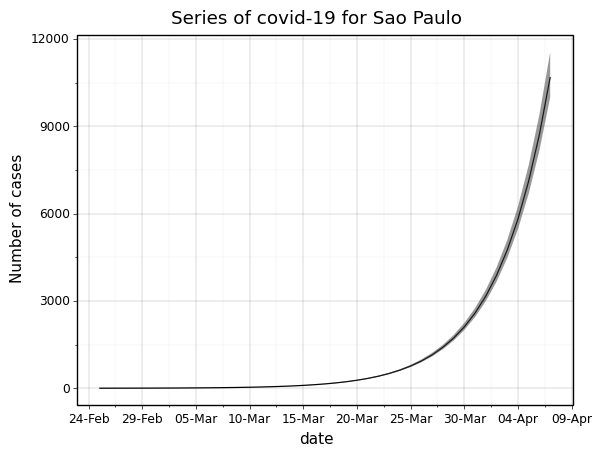

<ggplot: (8775935508744)>

In [7]:
#plot graph using ggplot
(ggplot(resultdf) + 
    geom_line(aes(x = "date", y = "Pred")) +
    geom_ribbon(aes(x = "date", ymin = "Pred_lb", ymax = "Pred_ub"), alpha = 0.5) +
    scale_x_datetime(breaks = date_breaks('5 days'), labels=date_format('%d-%b')) +
    ggtitle("Series of covid-19 for Sao Paulo") +
    ylab("Number of cases"))